# Linear least squares

## Fitting data by polynomials

Here are 5-year averages of the worldwide temperature anomaly as compared to the 1951-1980 average (source: NASA).

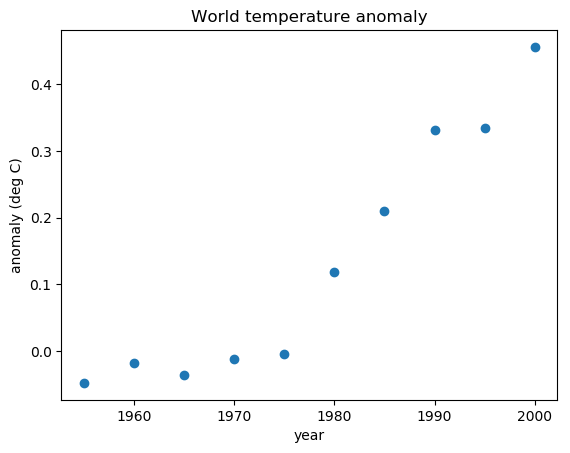

In [7]:
using LinearAlgebra,PyPlot

year = 1955:5:2000;
anomaly = [ -0.0480, -0.0180, -0.0360, -0.0120, -0.0040, 0.1180, 0.2100, 0.3320, 0.3340, 0.4560 ];
plot(year,anomaly,"o");
title("World temperature anomaly");
xlabel("year"); ylabel("anomaly (deg C)");

The numbers work better if we measure time in years since 1955. (We can quantify the reasons later in the course.) 

In [3]:
t = year .- 1955;
@show m = length(t);

m = length(t) = 10


A polynomial through all of these points has to have degree at least 9 in general (i.e., unless the points are special). We can solve for the coefficients of this polynomial by solving a $10\times 10$ Vandermonde system.

In [6]:
A = [t[i]^j for i=1:m,j=0:m-1]; 
b = anomaly;

c = A\b;   # coefficients, from degree 0 to m-1

using Polynomials
p = Poly(c)

┌ Info: Precompiling Polynomials [f27b6e38-b328-58d1-80ce-0feddd5e7a45]
└ @ Base loading.jl:1186


Poly(-0.048 + 0.3655471428571423*x - 0.1821111666666659*x^2 + 0.03600809999999972*x^3 - 0.003737914999999952*x^4 + 0.00022573177777777346*x^5 - 8.205466666666444e-6*x^6 + 1.7689396825396164e-7*x^7 - 2.0826666666665615e-9*x^8 + 1.0311111111110426e-11*x^9)

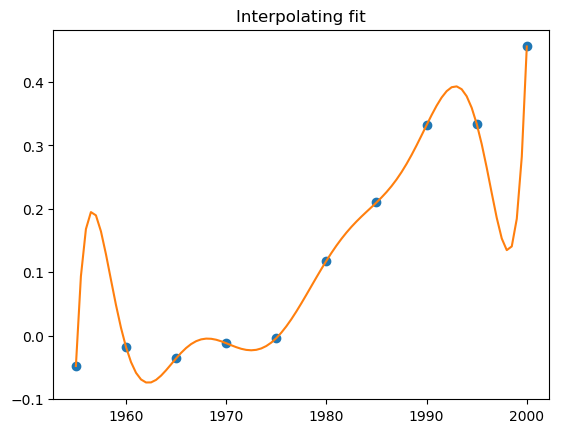

PyObject Text(0.5,1,'Interpolating fit')

In [11]:
plot(year,anomaly,"o");
x = 1955:0.5:2000;
plot(x,p(x.-1955));
title("Interpolating fit")

As intended, the polynomial interpolates the data, but it obviously gives a lot of unphysical nonsense. This phenomenon, which is common with interpolating polynomials over equally spaced nodes, is an example of _overfitting_ in machine learning. 

We actually get a better approximation by reducing the degree to 3. 

In [10]:
A = A[:,1:4];

We now have an overdetermined system of linear equations. The easiest way to define a solution is to minimize the 2-norm of the residual--i.e., least squares. In MATLAB we use the same backslash operator as for square systems, even though the algorithms are very different. 

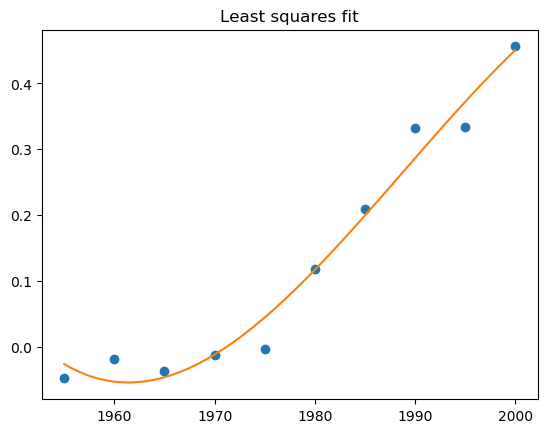

In [12]:
c = A\b;   # coefficients, from degree 0 to 3

p = Poly(c);  # fitting polynomial
plot(year,anomaly,"o");
x = 1955:0.5:2000;
plot(x,p(x.-1955));
title("Least squares fit");

This polynomial certainly appears to describe the data better. (Not that it's any less depressing for the fate of the planet.)

## Three least squares algortithms

There are three distinct ways to solve the general dense linear least squares problem. First, we can pose and solve the normal equations.

In [17]:
B = A'*A;  z = A'*b;
@show size(B);

size(B) = (4, 4)


In [21]:
@show c;
@show B\z;

c = [-0.0261566, -0.00908228, 0.000785734, -7.74825e-6]
B \ z = [-0.41352, 0.0713442, -0.00315058, 3.99383e-5]


Second, we can use a thin QR factorization to express the range of $A$ orthonormally, and reduce to a triangular square system.

In [20]:
Q,R = qr(A);  z = Matrix(Q)'*b;
@show c;
@show R\z;

c = [-0.0261566, -0.00908228, 0.000785734, -7.74825e-6]
R \ z = [-0.0261566, -0.00908228, 0.000785734, -7.74825e-6]


Equivalently,

In [22]:
fac = qr(A);  
@show fac\b;

fac \ b = [-0.0261566, -0.00908228, 0.000785734, -7.74825e-6]


And third, we can use the SVD to orthgonalize both the range and the domain, ultimately getting a diagonal square system.

In [23]:
U,s,V = svd(A);  
z = U'*b;
@show V*(z./s);

V * (z ./ s) = [-0.0261566, -0.00908228, 0.000785734, -7.74825e-6]


In the coming chapters we will take a deep look at why mathematically equivalent algorithms difffer when implemented numerically. It turns out that each of the three algorithms above has a set of problems on which it might be considered the 'best'.